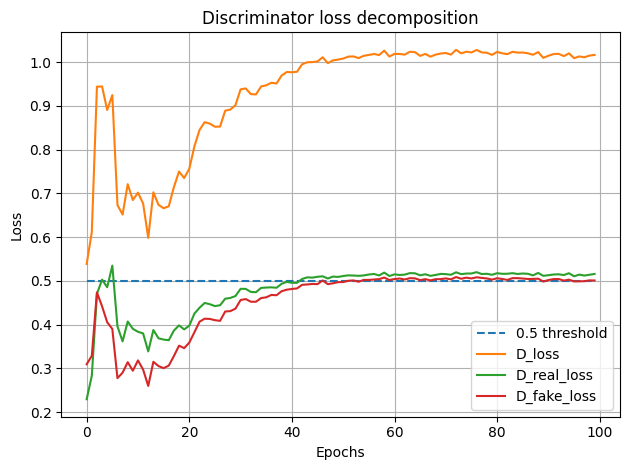

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from latent_space_OT import make_image
from model import Generator, Discriminator
from utils import load_model
import torchvision
import os

G_loss = np.load('metrics/100_0.0002_64/G_loss.npy')
D_loss = np.load('metrics/100_0.0002_64/D_loss.npy')
D_real_loss = np.load('metrics/100_0.0002_64/D_real_loss.npy')
D_fake_loss = np.load('metrics/100_0.0002_64/D_fake_loss.npy')
fid = np.load('metrics/100_0.0002_64/fid_values.npy')

#plt.plot(G_loss, label = 'G_loss')
plt.plot(0.5 * np.ones(D_loss.shape), '--', label = '0.5 threshold')
plt.plot(D_loss, label = 'D_loss')
plt.plot(D_real_loss, label ='D_real_loss')
plt.plot(D_fake_loss, label = 'D_fake_loss')
plt.title('Discriminator loss decomposition')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.tight_layout()
plt.legend()

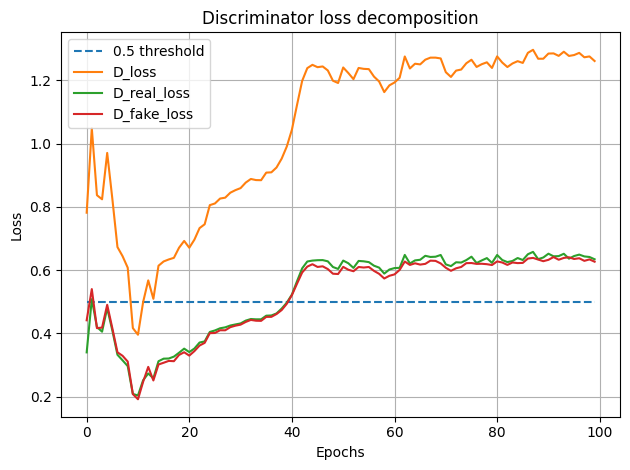

In [2]:
G_loss = np.load('metrics/epochs_100_lr_0.0002_batch_64_spectral_normalized/G_loss.npy')
D_loss = np.load('metrics/epochs_100_lr_0.0002_batch_64_spectral_normalized/D_loss.npy')
D_real_loss = np.load('metrics/epochs_100_lr_0.0002_batch_64_spectral_normalized/D_real_loss.npy')
D_fake_loss = np.load('metrics/epochs_100_lr_0.0002_batch_64_spectral_normalized/D_fake_loss.npy')
fid = np.load('metrics/epochs_100_lr_0.0002_batch_64_spectral_normalized/fid_values.npy')

#plt.plot(G_loss, label = 'G_loss')
plt.plot(0.5 * np.ones(D_loss.shape), '--', label = '0.5 threshold')
plt.plot(D_loss, label = 'D_loss')
plt.plot(D_real_loss, label ='D_real_loss')
plt.plot(D_fake_loss, label = 'D_fake_loss')
plt.title('Discriminator loss decomposition')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.tight_layout()
plt.legend()

In [3]:
mnist_dim = 784
device = torch.device('mps')
G = Generator(g_output_dim = mnist_dim).to(device)
G.device = device
G = load_model(G, 'checkpoints', mode = 'G_b')
D = Discriminator(mnist_dim).to(device)
def load_model(model, folder, mode='G'):
    ckpt = torch.load(os.path.join(folder, mode + '.pth'), map_location=torch.device(device))
    # Adjust key names if needed
    adjusted_ckpt = {}
    for k, v in ckpt.items():
        new_key = k
        # Example: Change key names if they differ
        if 'weight' in k:
            new_key = k.replace('weight', 'weight_orig')  # Modify this line as needed
        adjusted_ckpt[new_key] = v
    model.load_state_dict(adjusted_ckpt, strict=False)  # Use strict=False to ignore unexpected keys
    return model

D = load_model(D, 'checkpoints', mode = 'D_b')
D.device = device

G = G.to(device)
D = D.to(device)
n_samples = 10000

/Users/constouille/Documents/GitHub/assignment2-2024-ganglions/utils.py:66: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(os.path.join(folder, mode +'.pth'

In [4]:
from high_dim_viz import *

transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(mean=(0.5), std=(0.5))])

train_dataset = datasets.MNIST(root='data/MNIST/', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='data/MNIST/', train=False, transform=transform, download=False)



X = train_dataset.data[:10000].reshape((-1,28*28))[:10000]
y = train_dataset.targets[:10000]
confidence = np.ones(len(y))
new_X = vgg5_encoding(X)
tsne_pipeline(new_X,y, f"MNIST Original Dataset -  VGG 5 (fine-tuned) Space",confidence)

/Users/constouille/Documents/GitHub/assignment2-2024-ganglions/high_dim_viz.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vgg5.load_state_dict(torch.load("model_vgg/V

KeyboardInterrupt: 

In [4]:
### For OT with SGD method
img = make_image(G = G, D= D, batchsize = n_samples, N_update=15, ot=True, k=1, lr=0.01, optmode='sgd', show=True)
os.makedirs("samples/fake_samples", exist_ok=True)
for k in range(img.shape[0]):
    torchvision.utils.save_image(img[k, :, :], os.path.join('samples/fake_samples', f'{k}.png'))
X = load_bw_images("samples/fake_samples")
print(X.shape)
y,confidence = labelize(X)
new_X = vgg5_encoding(X)
tsne_pipeline(new_X,y, f"MNIST Fake Dataset -  VGG 5 (fine-tuned) Space",confidence)

1
1_bis


: 

Change detected
Change detected
Change detected
Change detected
Change detected
Change detected
Change detected
Change detected
Change detected
Change detected
Change detected
Change detected
Change detected
Change detected
Change detected
Change detected
Change detected
Change detected
Change detected
Change detected
Change detected
Change detected
Change detected
Change detected
Change detected
Change detected
Change detected
Change detected
Change detected
Change detected


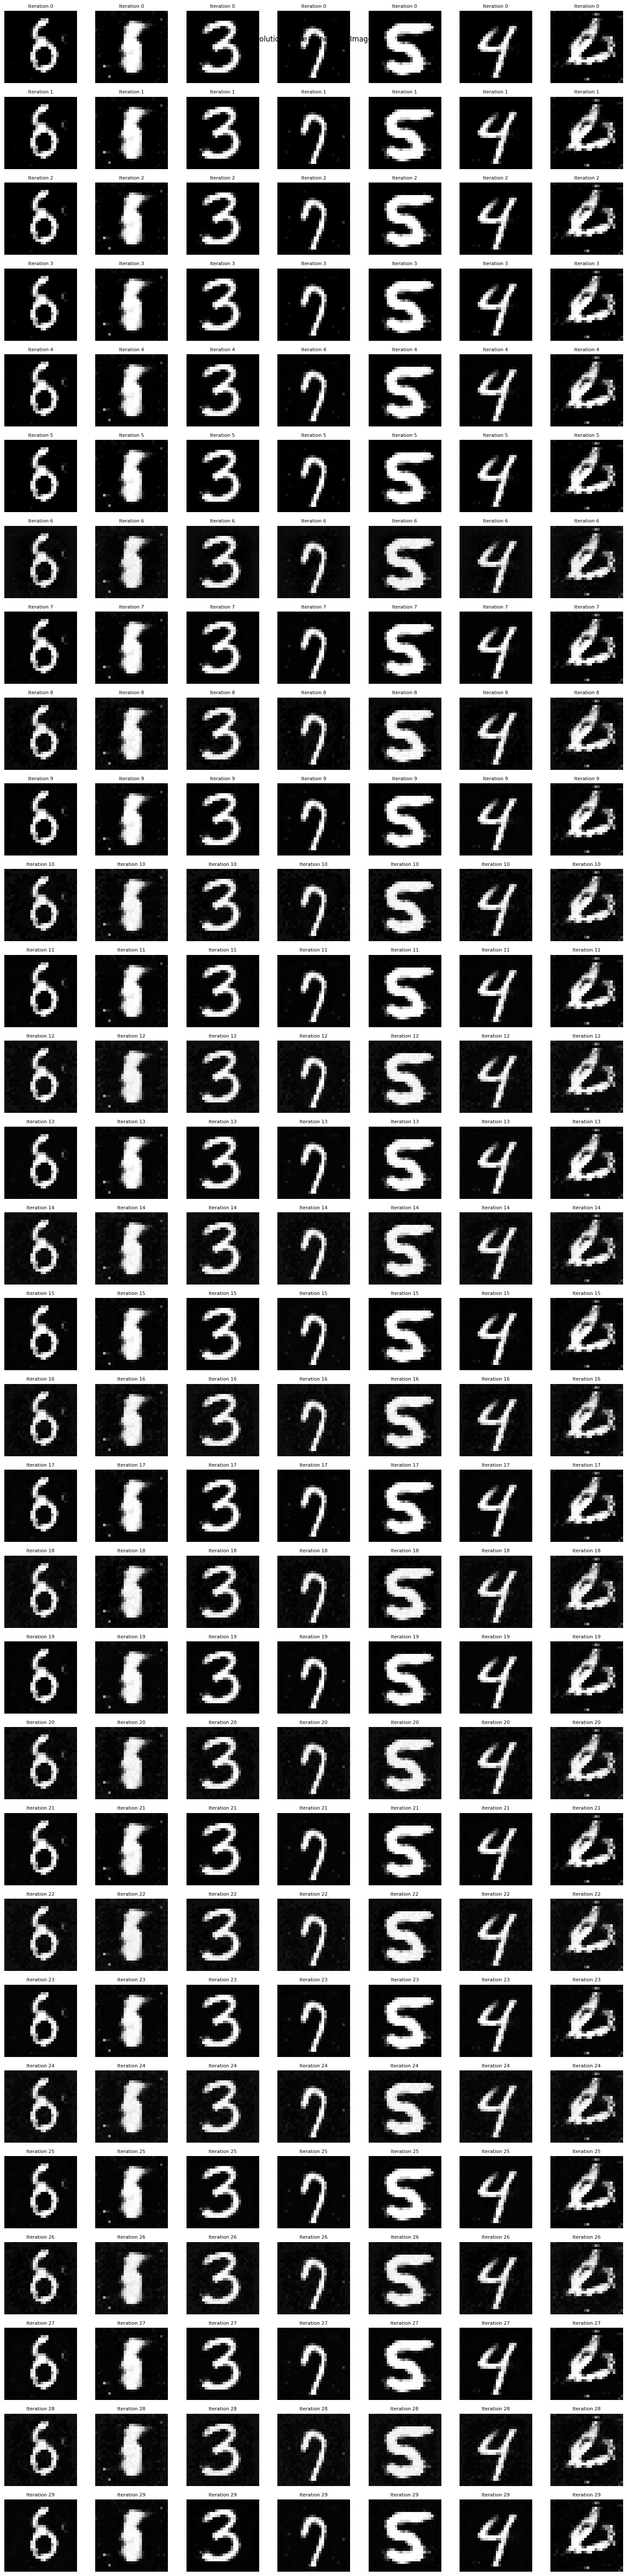

NameError: name 'load_bw_images' is not defined

In [4]:
#### For Adam Optimizer ########
img = make_image(G = G, D= D, batchsize = n_samples, N_update= 30, ot=True, space='target', k=1, lr=0.0001, optmode='adam', show=True)
os.makedirs("samples/fake_samples", exist_ok=True)
for k in range(img.shape[0]):
    torchvision.utils.save_image(img[k, :, :], os.path.join('samples/fake_samples', f'{k}.png'))
X = load_bw_images("samples/fake_samples")
print(X.shape)
y,confidence = labelize(X)
new_X = vgg5_encoding(X)
tsne_pipeline(new_X,y, f"MNIST Fake Dataset with Adam Optimizer -  VGG 5 (fine-tuned) Space",confidence)

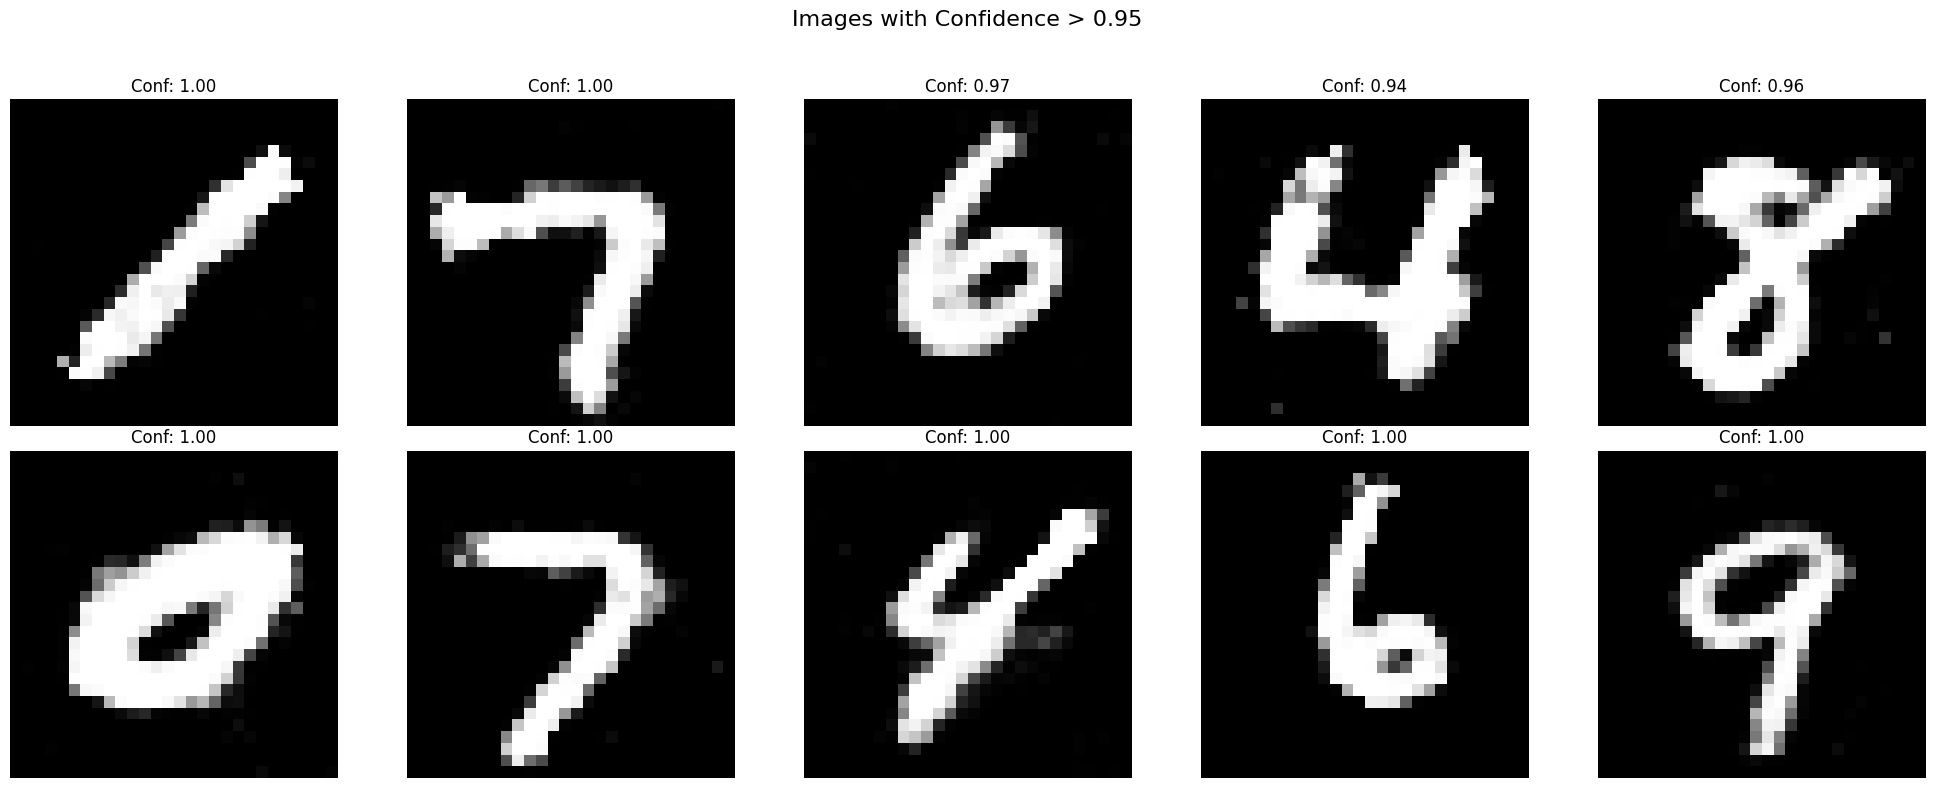

In [7]:
# Randomly select 10 indices from those with confidence > 0.95
random_idx = np.random.choice(np.where(confidence > 0.7)[0], size=10, replace=False)

# Create a figure with larger dimensions
pfig, ax = plt.subplots(2, 5, figsize=(20, 8))  # Increased size for better visibility
pfig.suptitle('Images with Confidence > 0.95', fontsize=16)  # Main title

for i, idx in enumerate(random_idx):
    ax[i // 5, i % 5].imshow(img[idx, :, :], cmap='gray')
    ax[i // 5, i % 5].axis('off')  # Turn off axis

    # Optionally, add a title for each subplot to show confidence score
    ax[i // 5, i % 5].set_title(f'Conf: {confidence[idx]:.2f}', fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the main title
plt.show()


###### torch.Size([10000, 1, 28, 28])
torch.Size([10000, 1, 28, 28])


extracting features of 10000 images: 100%|██████████| 625/625 [00:05<00:00, 115.02it/s]


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.002s...
[t-SNE] Computed neighbors for 10000 samples in 1.772s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.135482
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.563354
[t-SNE] KL divergence after 1000 iterations: 1.024971


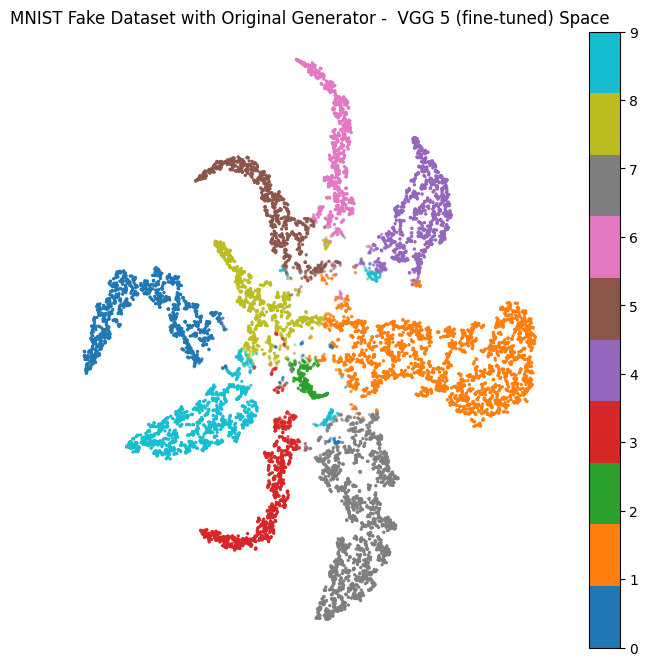

In [8]:
img = make_image(G = G, D= D, batchsize = n_samples, N_update=100, ot= False, mode='dot', k=1, lr=0.05, optmode='adam')
os.makedirs("samples/fake_samples", exist_ok=True)
for k in range(img.shape[0]):
    torchvision.utils.save_image(img[k, :, :], os.path.join('samples/fake_samples', f'{k}.png'))
X = load_bw_images("samples/fake_samples")
print(X.shape)
y,confidence = labelize(X)
new_X = vgg5_encoding(X)
tsne_pipeline(new_X,y, f"MNIST Fake Dataset with Original Generator -  VGG 5 (fine-tuned) Space",confidence)